<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/Support-Vector-Machine/primer_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis DataSet - Heart Attack**

**Aim :** predecir el resultado de un ataque cardíaco

Features:

**Age :** Edad del paciente

**Sex :** Sexo del paciente.

**cp :** tipo de dolor en el pecho:

Valor 0: angina típica

Valor 1: angina atípica

Valor 2: dolor no anginoso

Valor 3: asintomático


**trtbps :** presión arterial en reposo (en mm Hg)

**chol :** colesterol en mg/dl obtenido mediante el sensor de IMC

**fbs :** (azúcar en sangre en ayunas > 120 mg/dl)

1 = verdadero

0 = falso

**rest_ecg :** resultados electrocardiográficos en reposo:

Valor 0: normal

Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)

Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

**thalach :** frecuencia cardíaca máxima alcanzada.

**exang :** angina inducida por el ejercicio:

1 = si

0 = no

**oldpeak :** depresión del ST inducida por el ejercicio en relación con el reposo.

Depresión del ST: un tipo de anomalía del segmento ST. El segmento ST es la parte plana e isoeléctrica del ECG y representa el intervalo entre la despolarización y la repolarización ventricular.


**slp :** la pendiente del segmento ST del ejercicio máximo

0 = sin pendiente

1 = plano

2 = descendente

**caa :** number of major vessels (0-3)
thall - Thalium Stress Test result ~ (0,3)

**thall :** Talasemia(es un trastorno sanguíneo genético que se caracteriza por una tasa de hemoglobina más baja de lo normal.)

0 = nulo

1 = defecto reparado

2 = normales

3 = defecto reversible

**output :** diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)

0: < 50% de estrechamiento del diámetro. menos posibilidades de enfermedad cardíaca

1: > 50% de estrechamiento del diámetro. más posibilidades de sufrir enfermedades cardíacas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

from google.colab import files

import io  # Importa el módulo io


#from ydata_profiling import ProfileReport


A continuacion se utilizan Data-profiling y Sweetviz como herramientas automaticas, solo a modo de guia, para comparar con el analisis tradicional.

In [ ]:
#https://github.com/monsegutier/Grupo4-PP1--Proyecto-ML/blob/main/heart.csv
github_url = 'https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv'

# Carga el archivo CSV desde la URL en un DataFrame
df = pd.read_csv(github_url)

In [ ]:
#pip install ydata-profiling

In [ ]:
#pip install sweetviz

In [ ]:
#import sweetviz as sv
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#my_report = sv.analyze(df)
#my_report.show_html() # Argumentos predeterminados generados para: "SWEETVIZ_REPORT.html"

In [ ]:
"""
my_report.show_notebook(  w=1200,
                h=700,
                scale=None,
                layout='widescreen',
                filepath=None)
"""

In [ ]:
# Reporte de Data Profiling
#profile = ProfileReport(df,title="HeartAtack Profile Report")
#profile.to_file("report.html")

In [ ]:
#Reporte
#profile

Analisis exploratorio de datos preliminar

In [ ]:
# Primeros 5 valores
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             302 non-null    int64  
 1   sex             302 non-null    int64  
 2   ChestPainType   302 non-null    int64  
 3   RestingBP       302 non-null    int64  
 4   chol            302 non-null    int64  
 5   FastingBS       302 non-null    int64  
 6   RestingECG      302 non-null    int64  
 7   MaxHR           302 non-null    int64  
 8   ExerciseAngina  302 non-null    int64  
 9   oldpeak         302 non-null    float64
 10  Slope           302 non-null    int64  
 11  MajorVessels    302 non-null    int64  
 12  StressTest      302 non-null    int64  
 13  output          302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
df.rename(columns = {"cp":"ChestPainType",
                     "trtbps":"RestingBP",
                     "fbs":"FastingBS",
                     "restecg":"RestingECG",
                     "thalachh":"MaxHR",
                     "exng":"ExerciseAngina",
                     "slp":"Slope",
                     "caa":"MajorVessels",
                     "thall":"StressTest"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             302 non-null    int64  
 1   sex             302 non-null    int64  
 2   ChestPainType   302 non-null    int64  
 3   RestingBP       302 non-null    int64  
 4   chol            302 non-null    int64  
 5   FastingBS       302 non-null    int64  
 6   RestingECG      302 non-null    int64  
 7   MaxHR           302 non-null    int64  
 8   ExerciseAngina  302 non-null    int64  
 9   oldpeak         302 non-null    float64
 10  Slope           302 non-null    int64  
 11  MajorVessels    302 non-null    int64  
 12  StressTest      302 non-null    int64  
 13  output          302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
df.describe()

,age,sex,ChestPainType,RestingBP,chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,Slope,MajorVessels,StressTest,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(302, 14)

Limpieza de datos

In [ ]:
df.isnull().sum() #(no contiene valores nulos)

age               0
sex               0
ChestPainType     0
RestingBP         0
chol              0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
oldpeak           0
Slope             0
MajorVessels      0
StressTest        0
output            0
dtype: int64

Identificacion de valores duplicados

In [ ]:
df.duplicated().sum()  #(contiene un valor duplicado)

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.value_counts()

age  sex  ChestPainType  RestingBP  chol  FastingBS  RestingECG  MaxHR  ExerciseAngina  oldpeak  Slope  MajorVessels  StressTest  output
29   1    1              130        204   0          0           202    0               0.0      2      0             2           1         1
59   1    2              150        212   1          1           157    0               1.6      2      0             2           1         1
          1              140        221   0          1           164    1               0.0      2      0             2           1         1
          0              170        326   0          0           140    1               3.4      0      0             3           0         1
                         164        176   1          0           90     0               1.0      1      2             1           0         1
                                                                                                                                           ..
51   1    0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'ChestPainType'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'ExerciseAngina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'Slope'}>,
        <Axes: title={'center': 'MajorVessels'}>],
       [<Axes: title={'center': 'StressTest'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

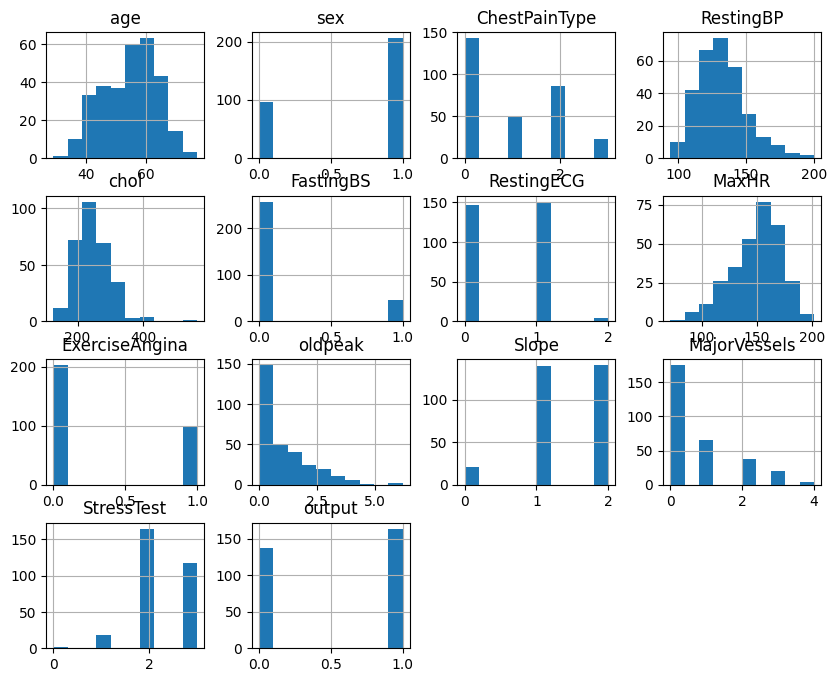

In [ ]:
df.hist(figsize=(10,8))

In [ ]:
matriz = df.corr()
print (matriz)

                     age       sex  ChestPainType  RestingBP      chol  \
age             1.000000 -0.094962      -0.063107   0.283121  0.207216   
sex            -0.094962  1.000000      -0.051740  -0.057647 -0.195571   
ChestPainType  -0.063107 -0.051740       1.000000   0.046486 -0.072682   
RestingBP       0.283121 -0.057647       0.046486   1.000000  0.125256   
chol            0.207216 -0.195571      -0.072682   0.125256  1.000000   
FastingBS       0.119492  0.046022       0.096018   0.178125  0.011428   
RestingECG     -0.111590 -0.060351       0.041561  -0.115367 -0.147602   
MaxHR          -0.395235 -0.046439       0.293367  -0.048023 -0.005308   
ExerciseAngina  0.093216  0.143460      -0.392937   0.068526  0.064099   
oldpeak         0.206040  0.098322      -0.146692   0.194600  0.050086   
Slope          -0.164124 -0.032990       0.116854  -0.122873  0.000417   
MajorVessels    0.302261  0.113060      -0.195356   0.099248  0.086878   
StressTest      0.065317  0.211452    

**Mapa de calor**

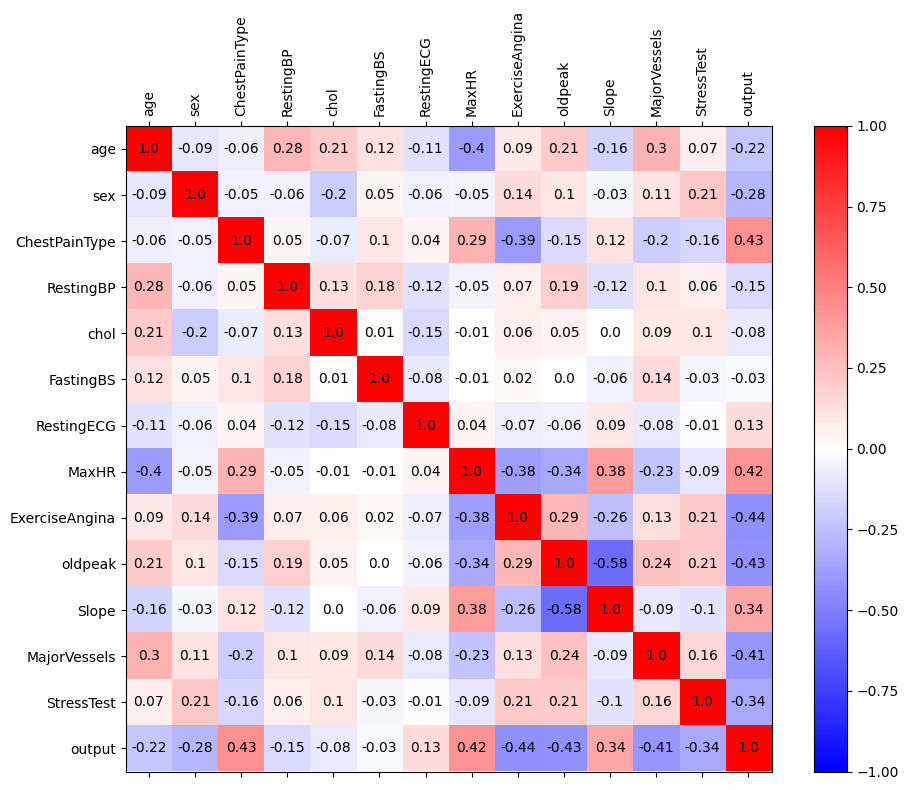

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)


for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, round(matriz.iloc[i, j], 2),
                       ha="center", va="center", color="black", fontsize=10)

cbar = fig.colorbar(cax)

plt.tight_layout()

plt.show()

In [ ]:
#Creacion copia del Dataset para usar en visualizacion
visual_data = df.copy()
visual_data.head(5)

,age,sex,ChestPainType,RestingBP,chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,Slope,MajorVessels,StressTest,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Creating bins and labels
bins = [17,30,45,100]
labels = ['Adultos_jovenes','Adultos_mediana_edad','Adultos_mayores']
df['age'] = pd.cut(df['age'],bins = bins, labels = labels)

<Axes: xlabel='age', ylabel='Count'>

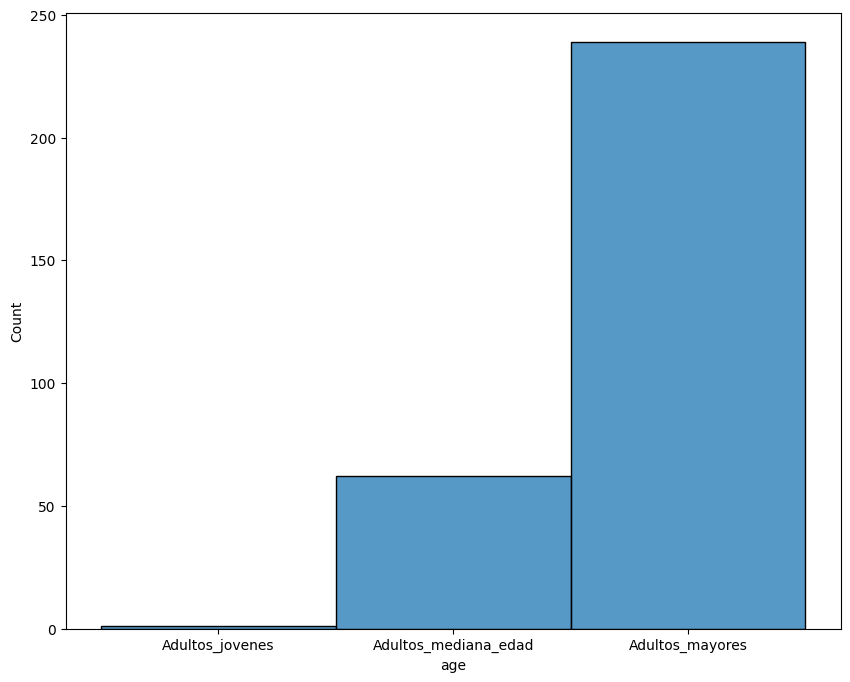

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['age'])

In [ ]:
bins = [0, 120, 130, 140, 200]
labels = ['Presión sanguínea normal', 'Presión sanguínea elevada', 'Presión sanguínea muy elevada', 'Presión sanguínea límite']

# Restringimos los datos al rango de los bins
df['RestingBP'] = pd.cut(df['RestingBP'], bins=bins, labels=labels)


<ipython-input-39-e7a6d62f9617>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


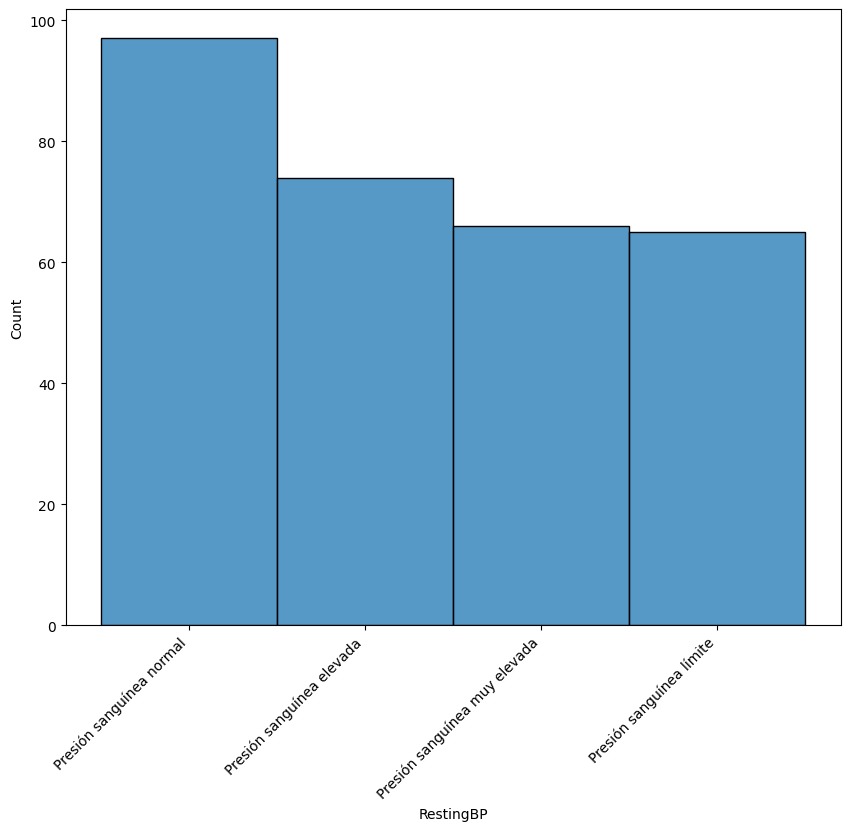

In [ ]:

plt.figure(figsize=(10, 8))
ax = sns.histplot(df['RestingBP'])

# Rotamos las etiquetas del eje x en 45 grados para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [ ]:

bins = [126,200,240,564]
labels = ['Colesterol_optimo','Colesterol_intermedio','Colesterol_alto']
df['chol'] = pd.cut(df['chol'],bins = bins, labels = labels)

<Axes: xlabel='chol', ylabel='Count'>

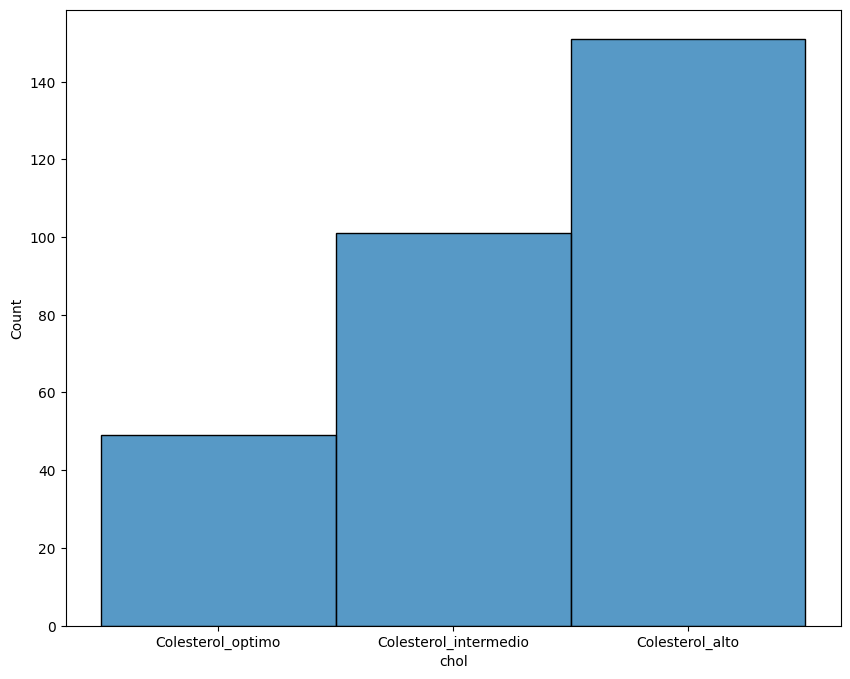

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['chol'])

Graficos de torta

In [ ]:
normal_chol = df.loc[df['chol']=='Colesterol_optimo']
elvate_chol = df.loc[df['chol']=='Colesterol_intermedio']
high_chol = df.loc[df['chol']=='Colesterol_alto']


normal_bp = df.loc[df['RestingBP']=='Presión sanguínea normal']
elvate_bp = df.loc[df['RestingBP']=='Presión sanguínea elevada']
high_bp = df.loc[df['RestingBP']=='Presión sanguínea muy elevada']
vhigh_bp = df.loc[df['RestingBP']=='Presión sanguínea límite']

In [ ]:
value = [len(normal_bp),len(elvate_bp),len(high_bp),len(vhigh_bp)]
name = ['Presión sanguínea normal','Presión sanguínea elevada','Presión sanguínea muy elevada','Presión sanguínea límite']

value2 = [len(normal_chol),len(elvate_chol),len(high_chol)]
name2 = ['Colesterol_optimo','Colesterol_intermedio','Colesterol_alto']



In [ ]:
px.pie(values = value,names=name,title= "Presion sanguinea de los pacientes")

In [ ]:
px.pie(values = value2,names=name2,title= "Niveles de colesterol de los pacientes")

Análisis de datos explicativos
Algunas ideas útiles tanto para empresas como para empresas de investigación farmacéutica:
1. Según las lecturas del gráfico circular, el 32,1% de los pacientes tienen presión arterial normal, mientras que el 24,5% de los pacientes tienen presión arterial elevada y el 43,4% de los pacientes tienen presión arterial alta.

2. Según las lecturas del gráfico circular, el 16,3% de los pacientes tienen niveles de colesterol normales, mientras que el 33,6% de los pacientes tienen niveles de colesterol intermedios y el 50,2% de los pacientes tienen niveles de colesterol altos.

3. Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen niveles de colesterol más altos que los adultos de mediana edad y los más jóvenes.

4. Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen presión arterial muy alta en comparación con los adultos de mediana edad y los más jóvenes.

5. Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen niveles altos de colesterol y, por lo tanto, niveles altos de presión arterial y es probable que sean más propensos a sufrir un ataque cardíaco en comparación con los adultos de mediana edad y más jóvenes.


